Using the linear regression algorithm, we can approximate a function that will model a system. In the case of a linear regression, we hope that the data is somewhat linear so that it can be modeled by a line. We can use this function to make predictions for new input.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

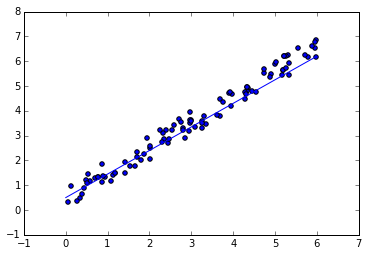

In [102]:
N=100
x = np.random.rand(N) *6
y = x + np.random.rand(N)*1
plt.scatter(x,y)
plt.plot([0,6],[0.5,6.2])

For the scatter plot above, we can apporximate a function that will minimuze the error between the function value y at x and the actual value of y at x. The error can be measured by:

$$Error = y_n - (mx_n+b)$$

the reason we choose squared error instead of 3rd or 4th power or 26th power of the error is because of the nice shape that squared errors will make when we make a graph of the squared error vs m and b. The graph will make a 3-d parabola with the smallest square error being at our optimally chosen m and b. Since this graph has only 1 minimum value it is really nice since we can always find this minimum, and the minimum will be unique. If we use higher exponents it would be harder to find the minimum value(s), and we could find possibly non unique minimums or only local minimums (values that look good compared to the neighbouring values but not the absolute best). So, in summary we used squared error because it gives us a minimum that is easy to find and is guaranteed to be the only minimum (this guarantees it is the best!).

$$SquaredError = (y_n - (mx_n+b))^2$$

$$SE_{line}=(y_1 - (mx_1+b))^2 + (y_2 - (mx_2+b))^2 + ... + (y_n - (mx_n+b))^2$$

$SE_{line}$ sum of the errors of our regression line. Thereore, the larger this number, the less accurate this line would be and by the same logic, the smaller the number the more accurate the regression line. So, by that logic it would say that if we find $m$ and $x$ such that it is the minimum possible value of $SE_{line}$ then we know that we have the most accurate regression line. Before we discuss findind the minimum of $SE_{line}$, lets first do some algebra to get $SE_{line}$ into a more convient form.

Expand the binomials...

$$SE_{line}=y_1^2-2y_1(mx_1+b)+(mx_2+b)^2+y_2^2-2y_2(mx_2+b)+(mx_2+b)^2+...+y_n^2-2y_n(mx_n+b)+(mx_n+b)^2$$

Group similar terms:

$$SE_{line}=(y_1^2+y_2^2+...+y_n^2) -2m(x_1 y_1+x_2 y_2+...+x_n y_n) -2b(y_1+y_2+...+y_n)+ m^2(x_1^2+x_2^2+...+x_n^2) +2mb(x_1+x_2+...+x_n)+nb^2$$

Substitute terms in parenthesis w/ mean representations....

$$\frac{(y_1^2+y_2^2+...+y_n^2)}{n} = \overline{y^2}      .. (1)$$

As you can see in equation 1, we can model all the temrs in the parentehsis as the arithemtic mean of $y^2$. Then in the next step below you can see that we can put it in terms of $ny^2$. We can do this for each tem in `SE_line` and then substitute back into it:

$$(y_1^2+y_2^2+...+y_n^2) = n\overline{y^2} $$

$$(x_1 y_1+x_2 y_2+...+x_n y_n) = n\overline{xy^2} $$

$$(y_1+y_2+...+y_n) = n\overline{y} $$

$$(x_1^2+x_2^2+...+x_n^2) = n\overline{x^2} $$

$$(x_1+x_2+...+x_n) = n\overline{x} $$

Now, subsitute these back into $SE_{line}$

$$SE_{line}=(n\overline{y^2}) -2m(n\overline{xy^2}) -2b(n\overline{y})+ m^2(n\overline{x^2}) +2mb(n\overline{x})+nb^2$$

In [15]:
def se_line(n,m,b, y_2_hat, x_y_2_hat, y_hat, x_2_hat, x_hat):
    val = n*y_2_hat - 2*m*(n*x_y_2_hat) - 2*b * (n*y_hat) + m**2*(n*x_2_hat) + 2*m*b*(n*x_hat) + n*b**2
    return val

### Minimize $SE_{line}$

We need to find the values of $m$ and $b$ such that $SE_{line}$ is minimized. If we want to find the minimum value of a function $f(x)$ we simply solve deriviative set eq to $0$. In our case we have a funcion with two variables and thus we have a plane or a surface, like the image below:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import math

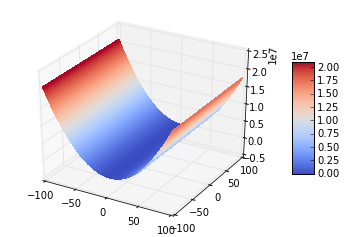

In [104]:
fig = plt.figure()
ax = fig.gca(projection='3d')


m=np.array(range(-N,N))
b=np.array(range(-N,N))

y_2_hat = (y**2).mean()
x_y_2_hat = (x * y**2).mean()
y_hat = y.mean()
x_2_hat = (x**2).mean()
x_hat = x.mean()
n=x.shape[0]

err = se_line(n,m,b,y_2_hat, x_y_2_hat, y_hat, x_2_hat, x_hat)

X,Y = np.meshgrid(m,b)
Z=err

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

$$SE_{line}=(n\overline{y^2}) -2m(n\overline{xy^2}) -2b(n\overline{y})+ m^2(n\overline{x^2}) +2mb(n\overline{x})+nb^2$$

$$  \frac{\partial SE_{line}}{\partial m} = 0 $$

$$  \frac{\partial SE_{line}}{\partial b} = 0 $$

$$ -2n \overline{xy} + 2n\overline{x^2}m + 2bn\overline{x} = 0  $$ 

$$ -2n \overline{y} + 2mn\overline{x} + 2bn = 0  $$ 

Now we have a system of equtions, where `m` & `n` will give us the smallest error. So if we find $m$ & $b$ we will have minimuzed the squared error. Let's simply the expressions by diving by $2n$:

$$ -\overline{xy} + m \overline{x^2} +b \overline{x}=0$$

$$ m \overline{x} +b = \overline{y}0$$

We can rearrange the terms...

$$   m \overline{x^2} +b \overline{x}=\overline{xy}$$

$$ m \overline{x} +b =\overline{y}$$

Solve the system...

$$   m = \frac{\overline{x} * \overline{y} * \overline{xy}}{(\overline{x})^2 - \overline{x^2}} $$

$$ b = \overline{y} - m\overline{x}$$